In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import os, shutil, pathlib

base_dir = os.getcwd() / pathlib.Path("PetImages")

new_dir = os.getcwd() / pathlib.Path("Images")
new_dir

In [ ]:
base_dir

In [4]:
cat_images=os.listdir(base_dir/"Cat")
cat_images.sort()
cat_images

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg'

In [ ]:
subset_name = "train"
category = "Cat"

start_index = 0
end_index =1000

dir = new_dir / subset_name / category
os.makedirs(dir,exist_ok=True)
fnames = [f"{i}.jpg" for i in range(start_index,end_index)]
for fname in fnames:
    shutil.copyfile(base_dir / category / fname, dir / fname)

In [17]:
def make_subset(subset_name,start_index,end_index):
    for category in ("Cat","Dog"):
        dir = new_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{i}.jpg" for i in range(start_index,end_index)]
        for fname in fnames:
            shutil.copyfile(base_dir / category / fname, dir / fname)
        
    
make_subset("train",start_index = 0, end_index =5000)
make_subset("val",start_index = 5000, end_index=7000)
make_subset("test",start_index =7000, end_index =12000)

In [18]:
def clean_data(subset_name):
    deleted = 0
    for category in ["Cat", "Dog"]:
        fnames = os.listdir(new_dir/ subset_name / category)
        for fname in fnames:
            try:
                img_bytes = tf.io.read_file(str(new_dir/ subset_name / category / fname))
                decoded_img = tf.io.decode_image(img_bytes)
            except:
                os.remove(new_dir/ subset_name / category / fname)
                deleted += 1

    print(deleted, "number of files")

clean_data("train")
clean_data("val")
clean_data("test")

4 number of files
0 number of files
5 number of files


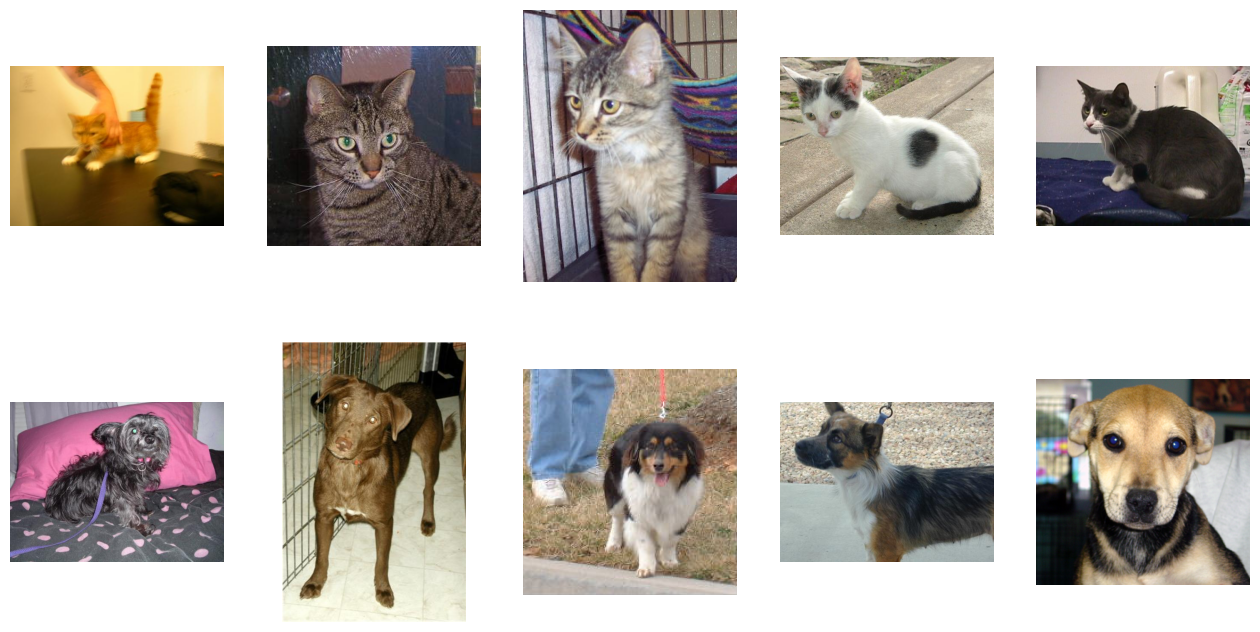

In [19]:
plt.figure(figsize = (16,8))

for i in range(5):
    plt.subplot(2,5, i+1)
    fname = str(i) + ".jpg"
    image = plt.imread(new_dir / "train" / "Cat"/fname)
    plt.imshow(image)
    plt.axis("off")
    plt.subplot(2,5, i+1 + 5)
    fname = str(i) + ".jpg"
    image = plt.imread(new_dir / "train" / "Dog"/fname)
    plt.imshow(image)
    plt.axis("off")

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "...Images//train",
    image_size = (180,180),
    batch_size = 32
)
val_dataset = image_dataset_from_directory(
    "...Images//val",
    image_size = (180,180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    "...Images//test",
    image_size = (180,180),
    batch_size = 32
)

Found 9996 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 11993 files belonging to 2 classes.


In [25]:
for data, label in train_dataset:
    print(data.shape)
    print(label.shape)
    break

(32, 180, 180, 3)
(32,)


In [29]:
mdl = keras.Sequential()

mdl.add(layers.Rescaling(1/255.0, input_shape=(180,180,3)))
mdl.add(layers.Conv2D(128,kernel_size=(3,3),activation="relu"))
mdl.add(layers.MaxPool2D(pool_size=2))

mdl.add(layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
mdl.add(layers.MaxPool2D(pool_size=2))

mdl.add(layers.Conv2D(32,kernel_size=(3,3),activation="relu"))
mdl.add(layers.MaxPool2D(pool_size=2))

mdl.add(layers.Flatten())
mdl.add(layers.Dense(128,activation="relu"))
mdl.add(layers.Dense(1,activation="sigmoid"))

mdl.compile(optimizer = "adam",loss='binary_crossentropy',metrics=['accuracy'])
mdl.fit(train_dataset,epochs=10,batch_size=10,validation_data=val_dataset)

Epoch 1/10
313/313 [==============================] - 25s 78ms/step - loss: 0.6904 - accuracy: 0.5321 - val_loss: 0.6446 - val_accuracy: 0.6294
Epoch 2/10
313/313 [==============================] - 23s 74ms/step - loss: 0.6194 - accuracy: 0.6578 - val_loss: 0.5571 - val_accuracy: 0.7162
Epoch 3/10
313/313 [==============================] - 23s 73ms/step - loss: 0.5044 - accuracy: 0.7527 - val_loss: 0.4799 - val_accuracy: 0.7790
Epoch 4/10
313/313 [==============================] - 23s 72ms/step - loss: 0.4008 - accuracy: 0.8163 - val_loss: 0.5043 - val_accuracy: 0.7756
Epoch 5/10
313/313 [==============================] - 23s 73ms/step - loss: 0.2782 - accuracy: 0.8776 - val_loss: 0.5530 - val_accuracy: 0.7886
Epoch 6/10
313/313 [==============================] - 23s 73ms/step - loss: 0.1640 - accuracy: 0.9335 - val_loss: 0.7453 - val_accuracy: 0.7846
Epoch 7/10
313/313 [==============================] - 23s 74ms/step - loss: 0.0875 - accuracy: 0.9700 - val_loss: 0.8493 - val_accuracy:

In [30]:
mdl.evaluate(test_dataset)

375/375 [==============================] - 11s 28ms/step - loss: 1.2342 - accuracy: 0.7900


[1.2341994047164917, 0.7899608016014099]

In [31]:
vgg= keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)

vgg.trainable=False


In [34]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(180,180,3)))
mdl.add(vgg)
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128,activation='relu'))
mdl.add(layers.Dense(32,activation='relu'))
mdl.add(layers.Dense(1,activation="sigmoid"))

mdl.compile(optimizer = "adam",loss='binary_crossentropy',metrics=['accuracy'])
mdl.fit(train_dataset,epochs=8,validation_data=val_dataset)

Epoch 1/8
313/313 [==============================] - 36s 114ms/step - loss: 0.5125 - accuracy: 0.9387 - val_loss: 0.2654 - val_accuracy: 0.9320
Epoch 2/8
313/313 [==============================] - 35s 110ms/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.1191 - val_accuracy: 0.9656
Epoch 3/8
313/313 [==============================] - 34s 108ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.1606 - val_accuracy: 0.9626
Epoch 4/8
313/313 [==============================] - 35s 113ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.2057 - val_accuracy: 0.9588
Epoch 5/8
313/313 [==============================] - 34s 110ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1886 - val_accuracy: 0.9626
Epoch 6/8
313/313 [==============================] - 35s 112ms/step - loss: 2.5715e-04 - accuracy: 1.0000 - val_loss: 0.1811 - val_accuracy: 0.9656
Epoch 7/8
313/313 [==============================] - 36s 114ms/step - loss: 1.1114e-04 - accuracy: 1.0000 - val_loss: 0.1815 - val_a

In [35]:
mdl.evaluate(test_dataset)

375/375 [==============================] - 27s 71ms/step - loss: 0.2001 - accuracy: 0.9707


[0.20009222626686096, 0.9707329273223877]